                                                    Уравнение Кеплера


                                                         Задача


Уравнение Кеплера для вычисления орбиты имеет вид 𝑀=𝐸−𝜀sin𝐸, где 𝑀 – средняя аномалия, 𝐸 – эксцентрическая аномалия, 𝜀 – эксцентриситет орбиты. Пусть 𝑀=142.055717, 𝜀=0.04.

Для примера возьмем планету Уран, т.к. примерно равные эксцентриситеты.

- Построим орбиту, используя метод последовательных приближений найдем E.

- Найдем E, используя scipy.optimize.brentq.

- Вычислим E с помощью формулы:

$$E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM)$$

где $J_m(x)$ – функция Бесселя$1$-го рода порядка $m$. Найдем $E$ по предыдущей формуле, используя равенство


$$J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.$$

Необходимые библиотеки

In [12]:
from scipy.optimize import brentq
from math import sin, cos, sqrt, factorial
import matplotlib.pyplot as plt
from scipy.special import jv

Вывод уравнения Кеплера$$sqrt(1-e^2)$$


Здесь e — эксцентриситет.


Найдем площадь от положения небесного тела на орбите, то есть от величины радиус-вектора $r$ и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию $E$. Направим ось $x$ от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид. Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.

Абсцисса небесного тела в точке $P$ будет равна

$$x=cos(E)-a*e$$
ордината будет, соответственно, равна

$$y=asin(E)sqrt(1-e^2)$$
Таким образом, получаем

$$x=rcos(v)=acos(E)-e$$$$y=rsin(v)=asin(E)*sqrt(1-e^2)$$

Для вычисления площади $S$ рассмотрим вспомогательные фигуры: сектор окружности $P'-O-Per$:

$$S1=a^2*E/2$$
Сектор эллипса $P-O-Per$:

$$S2=S1*sqrt(1-e^2)$$
Треугольник $O-O'-P$:

$$S3=1/2(yae)=1/2a^2esinE*sqrt(1-e^2)$$
Сектор $-O'-Per$:

$$S=S2-S3$$
Отсюда, прощадь $S$ равна:

$$S(t)=1/2a^2sqrt(1-e^2)(E-esin(E))$$
Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем:

$$M(t)=E(t)-e*sin(E(t))$$
где $M(t)=2pit/T$

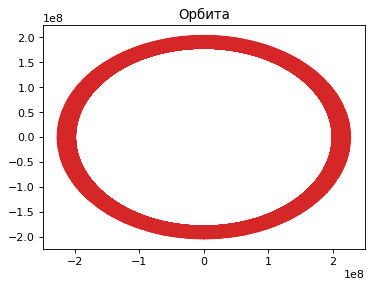

In [78]:
A = -160 #данные числа A и B задаются для решения задачи, они никак не влияют на график "Орбита", они влияют только на размер графика "Зависимость аномалии" 
B = 160
N = 360 #число N влияет на количество линий в графике "Орбита"
Eps = 0.04
M = 142.055717
a = 1496e5*1.52
m = 5
n = 10
N = int(N)
def e(e_old):
    return e_old - M - Eps*sin(e_old)
r = [i for i in range(0, N)]
dx = [a*cos(i)-Eps for i in r]
dy = [a*sin(i)*sqrt(1-Eps**0.5) for i in r]
fig = plt.figure(figsize=(5.2, 3.7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(dx, dy, color = 'tab:red')
plt.title('Орбита')
pass


Рассчитаем и приведем зависимость аномалии:

In [49]:
x = [((B-A)/N)*i for i in range(N)]
M0 = [e(x[i]) for i in range(N)]

Вычислим $E$ методом последовательных приближений:$$M=E-e*sin(E)$$

$$Е = М + e*sin E$$
В правую часть уравнения вместо $Е$ подставляется $М$ и находится

$$Е1 = М + e sin М$$
Затем в правую часть уравнения вместо $Е$ подставляется $Е1$ и находится $Е2$ и так далее

$$Е(k+1)= М + e*sin Ek$$

- $E$ при помощи scipy.optimize.brentq:


In [50]:
E1 = brentq(e, A, B)

- $Е$ при помощи метода последовательных приближений с использованием встроенной функции Бесселя

In [51]:
E2 = list()
for i in range(1, m+1):
    E2.append(1/i*jv(i, Eps)*sin(i*M))
E2 = M + 2*sum(E2)


- $Е$ при помощи метода последовательных приближений с использованием формулы для функции Бесселя

In [52]:
E3 = list()
for i in range(1, m+1):
    Jv = [((-1)**j*((i*Eps)/2)**(2*j+i))/(factorial(j)*factorial(i+j)) for j in range(n)]
    Jv = sum(Jv)
    E3.append(1/i*Jv*sin(i*M))
E3 = M + 2*sum(E3)

In [53]:
print('При промощи scipy.optimize.brentq: мы получили эксцентрическую аномалю под номер\n'
     'E1 = ' + str(E1) + ';\n')
print('При промощи последовательных приближений с использованием встроенной функции Бесселя мы получили эксцентрическую аномалю под номер\n'
     'E2 = ' + str(E2) + ';\n')
print('При промощи последовательных приближений с использованием формулы для функции Бесселя мы получили эксцентрическую аномалю под номер\n'
     'E3 = ' + str(E3) + ';\n')

При промощи scipy.optimize.brentq: мы получили эксцентрическую аномалю под номер
E1 = 142.03120694242355;

При промощи последовательных приближений с использованием встроенной функции Бесселя мы получили эксцентрическую аномалю под номер
E2 = 142.0306397414462;

При промощи последовательных приближений с использованием формулы для функции Бесселя мы получили эксцентрическую аномалю под номер
E3 = 142.03120694242355;



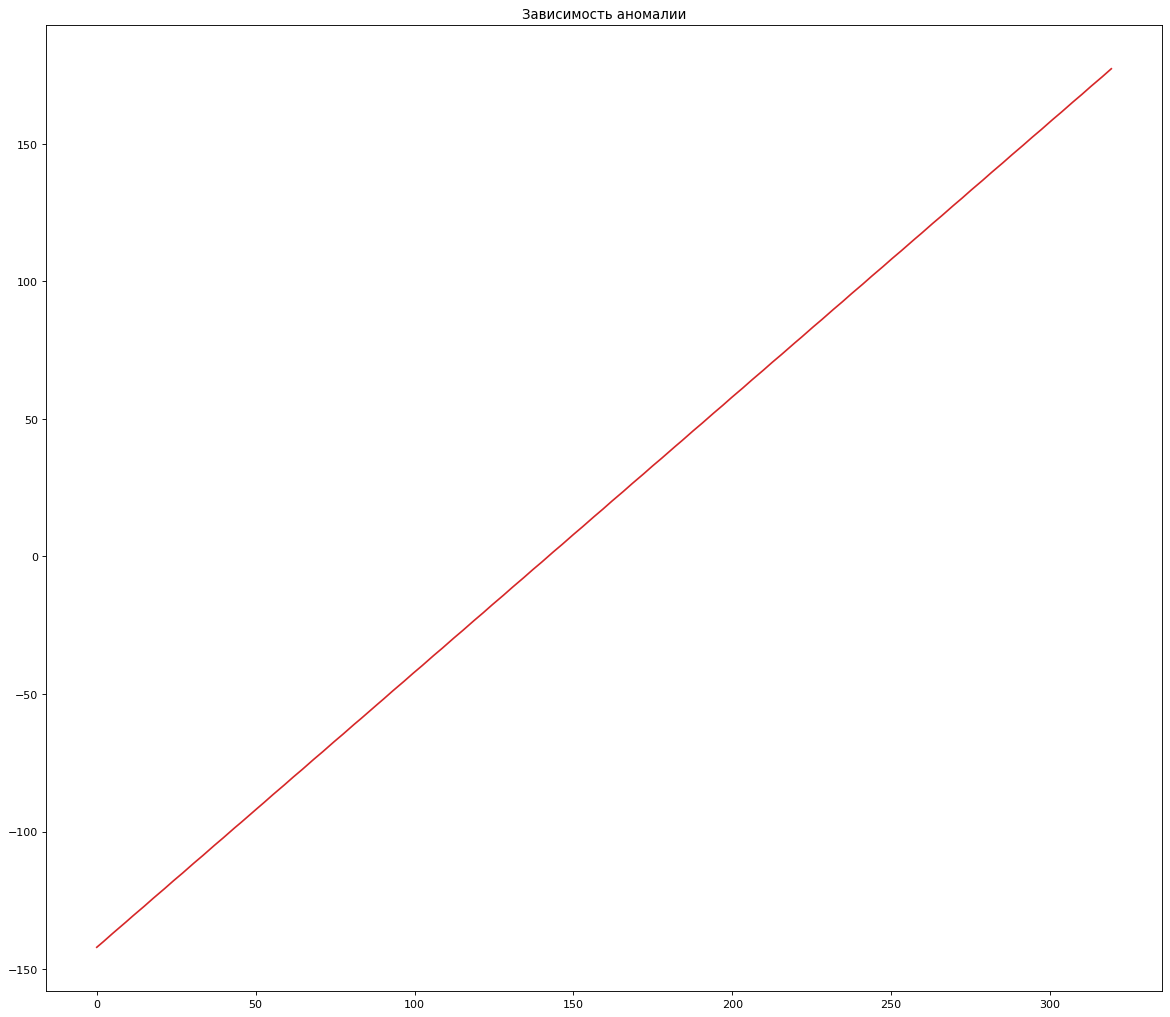

In [54]:
# Создание и вывод графиков
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x, M0, color = 'tab:red')
plt.title('Зависимость аномалии')
pass

In [55]:
print('Значения:\n'
      '   * E1 = ' + str(E1) + ';\n'
      '   * E2 = ' + str(E2) + ';\n'
      '   * E3 = ' + str(E3) + ';\n'
      )

Значения:
   * E1 = 142.03120694242355;
   * E2 = 142.0306397414462;
   * E3 = 142.03120694242355;



Вывод


- Мы можем увидеть что все 3 результата показали одинаковый результат

- А так же самый долгий способ - нахождение эксцентрической аномалии это метод последовательных приближений с использованием формулы для функции Бесселя. Остальные два способа работают одинакого быстро.